# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"

## LGMVIP Aug-22

## Ayush Dilip Padvekar

## TASK 1 - Iris Flowers Classification ML Project

This particular ML project is usually referred to as the "Hello World" of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Dataset Link - https://archive.ics.uci.edu/ml/datasets/Iris

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Loading Dataset

In [3]:
column_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df = pd.read_csv('iris.data', names=column_names)

### Summary

In [4]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Exploratory Data Analysis

### Pair Plot

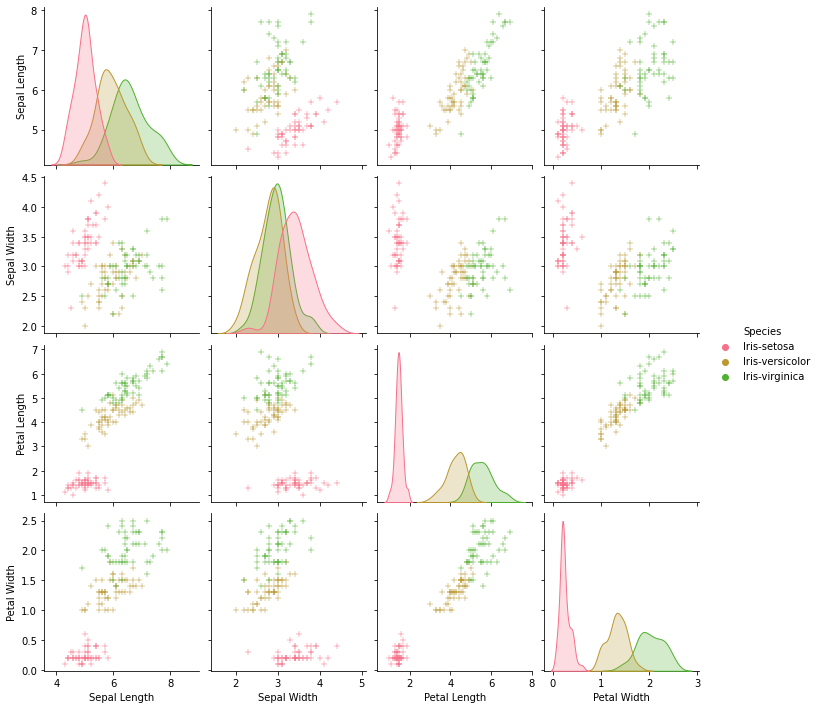

In [11]:
sns.pairplot(df, hue='Species', markers='+')
plt.show()

### Scatter Plot

In [12]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

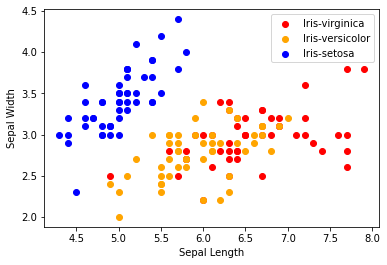

In [13]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal Length'], x['Sepal Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend();

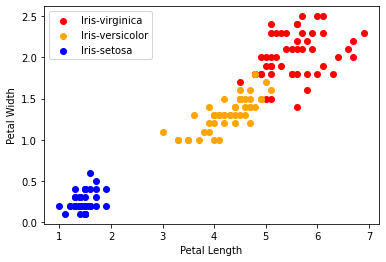

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Petal Length'], x['Petal Width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend();

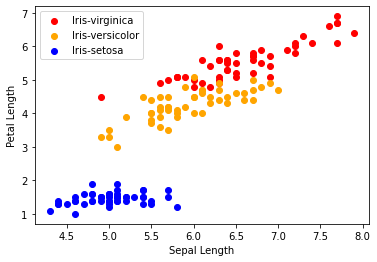

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal Length'], x['Petal Length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend();

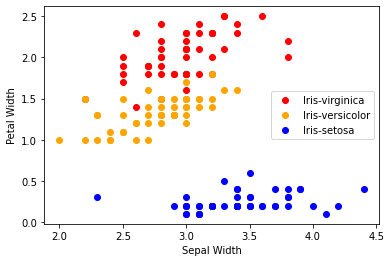

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['Sepal Width'], x['Petal Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend();

### Violin Plot

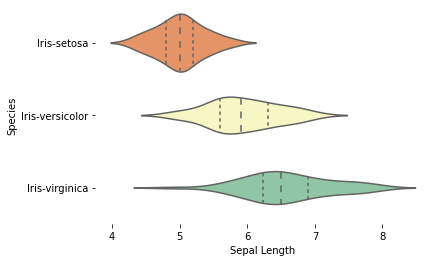

In [18]:
sns.violinplot(y='Species',palette='Spectral', x='Sepal Length', data=df, inner='quartile')
sns.despine(left=True, bottom=True)
plt.show()

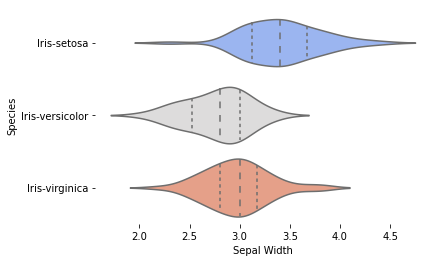

In [19]:
sns.violinplot(y='Species',palette='coolwarm', x='Sepal Width', data=df, inner='quartile')
sns.despine(left=True, bottom=True)
plt.show()

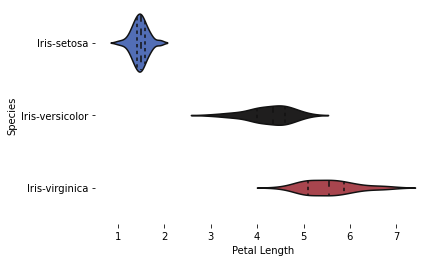

In [20]:
sns.violinplot(y='Species',palette='icefire', x='Petal Length', data=df, inner='quartile')
sns.despine(left=True, bottom=True)
plt.show()

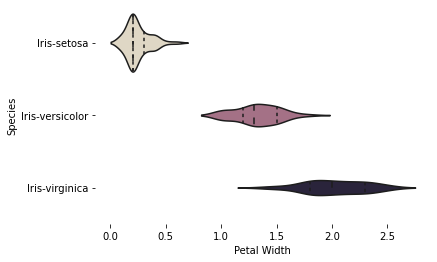

In [21]:
sns.violinplot(y='Species',palette='ch:s=-.2,r=.6', x='Petal Width', data=df, inner='quartile')
sns.despine(left=True, bottom=True)
plt.show()

### Line Plots

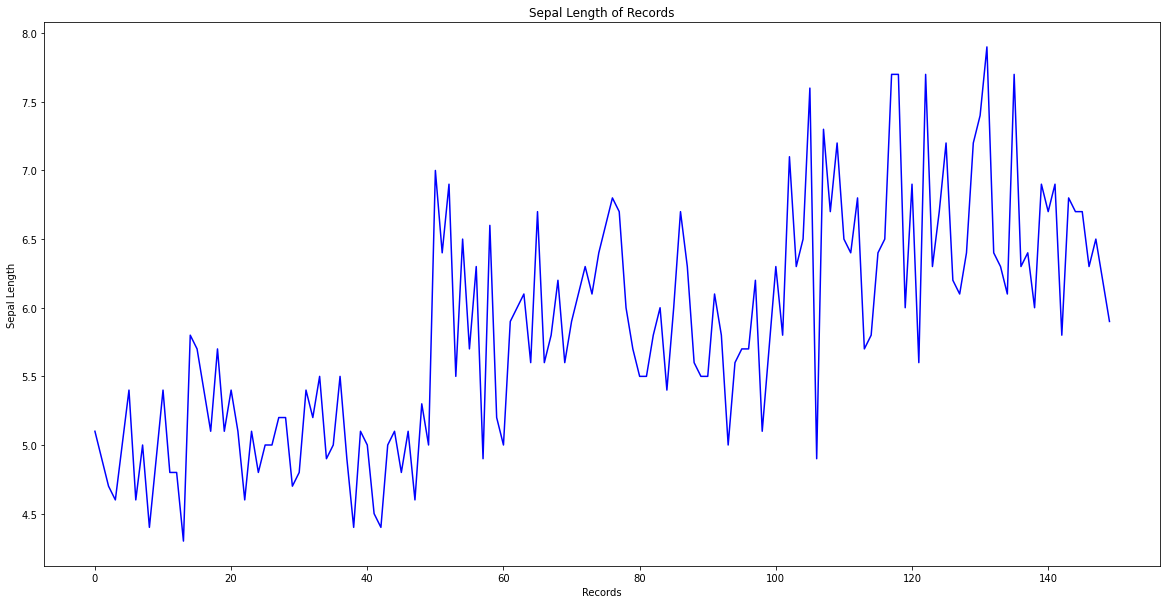

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df["Sepal Length"], color='blue') 
plt.xlabel('Records')
plt.ylabel('Sepal Length')
plt.title("Sepal Length of Records");
plt.show()

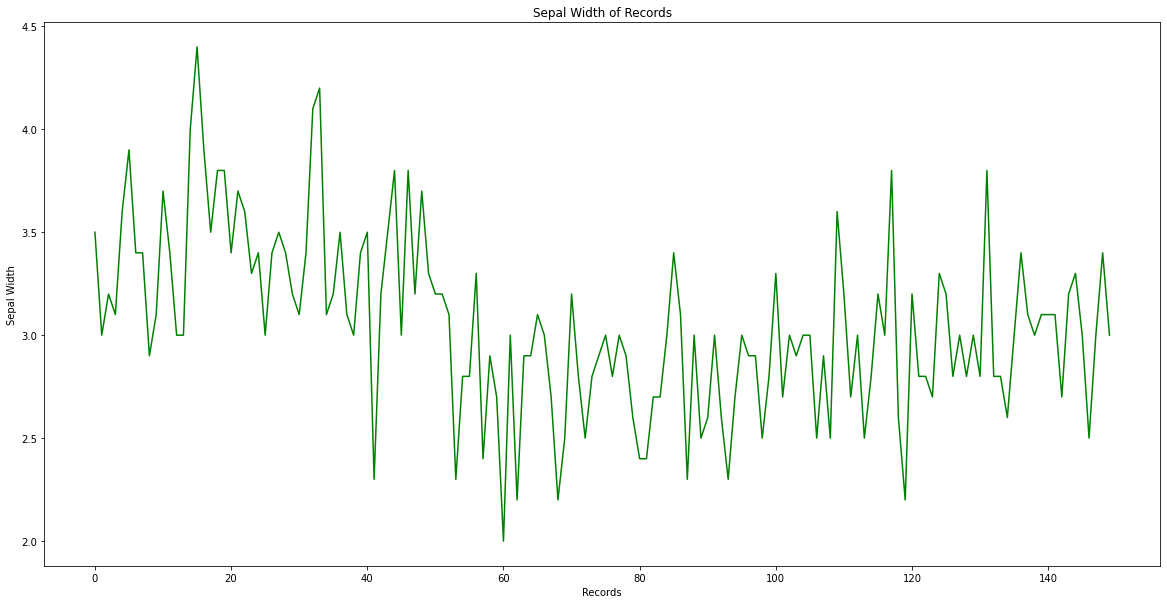

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df["Sepal Width"], color='green')
plt.xlabel('Records')
plt.ylabel('Sepal Width')
plt.title("Sepal Width of Records");
plt.show()

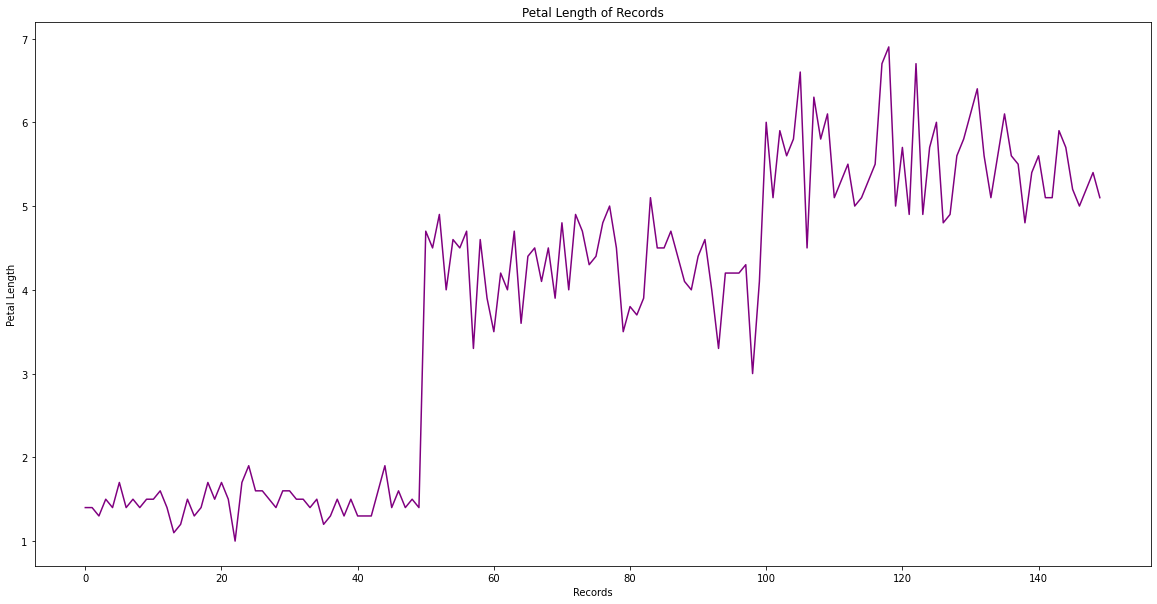

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df["Petal Length"], color='purple')
plt.xlabel('Records')
plt.ylabel('Petal Length')
plt.title("Petal Length of Records");
plt.show()

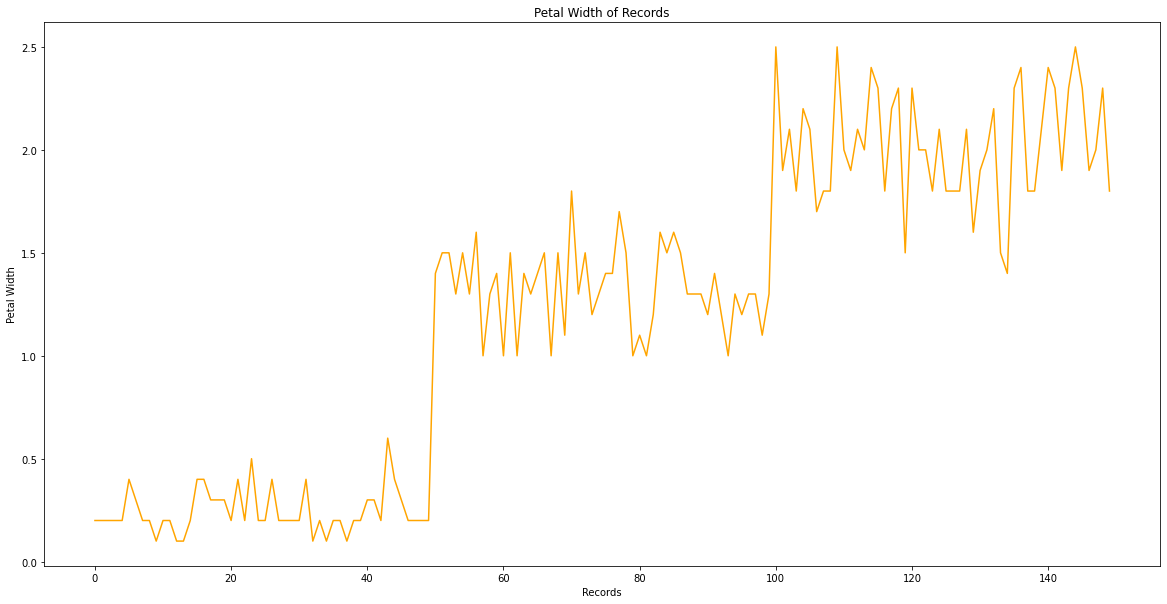

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(df.index, df["Petal Width"], color='orange')
plt.xlabel('Records')
plt.ylabel('Petal Width')
plt.title("Petal Width of Records");
plt.show()

### Checking correlation

### Heatmap

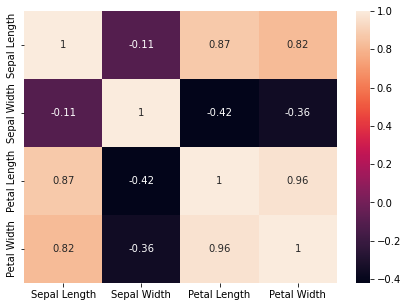

In [27]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Build Model
### Label Encoder

In [28]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting dataset

In [29]:
target = 'Species'
X = df.drop(columns=[target], axis=1)
y = df[target]
print(f'Shape of feature matrix, X: {X.shape} | shape of target vector, y: {y.shape}')

Shape of feature matrix, X: (150, 4) | shape of target vector, y: (150,)


### Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print(f'Shape of training set, X_train: {X_train.shape} | y_train: {y_train.shape}')
print(f'Shape of test set, X_test: {X_test.shape} | y_test: {y_test.shape}')

Shape of training set, X_train: (135, 4) | y_train: (135,)
Shape of test set, X_test: (15, 4) | y_test: (15,)


### Model Creation

In [31]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVC', SVC(gamma='auto')))

In [32]:
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10,
                            random_state=1, 
                            shuffle=True)
    cv_results = cross_val_score(model,
                                 X_train,
                                 y_train,
                                 cv=kfold,
                                 scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f' % (name, cv_results.mean()*100))

LR: 96.373626
LDA: 97.802198
KNN: 95.604396
DTC: 94.120879
GNB: 94.890110
RFC: 93.406593
SVC: 97.087912


### Linear Discriminant Analysis (LDA)

In [33]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)

pred = model_lda.predict(X_test)

In [34]:
acc_score = accuracy_score(y_test, pred)
class_report = classification_report(y_test, pred)
print(f'Test Accuracy for LDA: {acc_score}')
print('Classification Report LDA:')
print(class_report)

Test Accuracy for LDA: 1.0
Classification Report LDA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [35]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

#Prediction of the species from the input vector
prediction = model_lda.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


### Support Vector Classifier

In [36]:
model_svc = SVC(gamma='auto')
model_svc.fit(X_train, y_train)
pred = model_svc.predict(X_test)

acc_score = accuracy_score(y_test, pred)
class_report = classification_report(y_test, pred)
print(f'Test Accuracy SVC: {acc_score}')
print('Classification Report SVC:')
print(class_report)

Test Accuracy SVC: 1.0
Classification Report SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [37]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

prediction = model_svc.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]
